# EJERCICIOS

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 
 - 1

¿Qué función de activación deberías usar en la capa de salida? 
 - Sigmoide

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 
 - 10 neuronas (1 neurona por clase), funcion de activacion: Softmax

¿Y si quieres que la red prediga los precios de la vivienda en California?
 - 1 neurona, funcion de activacion: Softmax

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

#### Obtener, separar datos

In [21]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

#Dividimos los datos completos de entrenamiento en datos de entrenamiento y validación
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [22]:
X_train.shape[1:]

(28, 28)

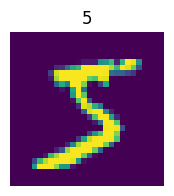

In [23]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0])
plt.axis('off')   # quita los ejes
plt.title(y_train[0])
plt.show()

#### Entrenar varios modelos

In [4]:
# 1 entrada, 2 ocultas y 1 salida de 10 neuronas(1 por clase)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  
])

In [5]:
# creamos carpeta si no existe para guardar los modelos y checkpoint
ruta_dir_mod = './recursos/modelos/4_3_2'
if not os.path.exists(ruta_dir_mod):
    os.mkdir(ruta_dir_mod)
if not os.path.exists('./recursos/checkpoint'):
    os.mkdir('./recursos/checkpoint')

# Si no mejora en 7 iteraciones el modelo para de entrenar
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_3_2_checkpoints.weights.h5", save_weights_only=True)

historys = []
rangos = [1e-4, 5e-4, 1e-3, 3e-3, 5e-3, 1e-2, 3e-2, 5e-2]
for lr in rangos :
    print('Learning rate: ',lr)
    # Se compila el modelo con el optimizador   
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),   # asignar tasa de aprendizaje
              metrics=['accuracy'])
    # entrenar
    hist = model.fit(X_train, y_train, epochs=70, validation_data=(X_valid, y_valid), 
                     callbacks=[checkpoint_cb,early_stopping_cb])
    historys.append(hist)
    
    # guardar
    ruta = "./recursos/modelos/4_3_2/my_keras_model_lr{}.keras".format(lr)
    model.save(ruta)
    print('\n\n')

Learning rate:  0.0001
Epoch 1/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6383 - loss: 18.0475 - val_accuracy: 0.8996 - val_loss: 1.9928
Epoch 2/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8945 - loss: 1.9363 - val_accuracy: 0.9202 - val_loss: 1.2597
Epoch 3/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9217 - loss: 1.1057 - val_accuracy: 0.9344 - val_loss: 0.9780
Epoch 4/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9410 - loss: 0.6951 - val_accuracy: 0.9370 - val_loss: 0.8615
Epoch 5/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9525 - loss: 0.4719 - val_accuracy: 0.9444 - val_loss: 0.7294
Epoch 6/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9603 - loss: 0.3604 - val_accuracy: 0.9500 - val_loss: 0.6698
Epoch 7/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9666 - loss: 0.2684 - val_accuracy: 0.9496 - val_loss: 0.6625
Epoch 8/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy

In [6]:
for i in range(len(historys)):
    # mostramos el historial de entrenamiento 
    print(' Modelo_{}: {}'.format(i,historys[i].params))


 Modelo_0: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_1: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_2: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_3: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_4: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_5: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_6: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_7: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}


#### Cargar y evaluar con bucle

In [7]:
# cargar
modelos = os.listdir(ruta_dir_mod)

for mod_ruta in modelos:
    model = tf.keras.models.load_model(ruta_dir_mod+'/'+mod_ruta)
    # evaluar
    print('Evaluacion {}: '.format(mod_ruta))
    eval = model.evaluate(X_test, y_test)
    

Evaluacion my_keras_model_lr0.0001.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.7376
Evaluacion my_keras_model_lr0.0005.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.2800
Evaluacion my_keras_model_lr0.001.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.2062
Evaluacion my_keras_model_lr0.003.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9431 - loss: 0.3058
Evaluacion my_keras_model_lr0.005.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7431 - loss: 1.0358
Evaluacion my_keras_model_lr0.01.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1033 - loss: 2.3009
Evaluacion my_keras_model_lr0.03.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1027 - loss: 2.3061
Evaluacion my_keras_model_lr0.05.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1009 - loss: 2.3061


## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

### Dividir datos

In [2]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
# entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42, stratify=y_train_full)
# prueba
X_test, y_test = load_svhn_data(test_url)

### Explorar datos

In [9]:
print('len: ',len(X_train))
X_train[0]

len:  62268


array([[[103, 110, 125],
        [103, 110, 126],
        [105, 112, 128],
        ...,
        [ 71,  80,  98],
        [ 66,  78,  95],
        [ 63,  76,  93]],

       [[104, 112, 126],
        [105, 112, 127],
        [104, 113, 128],
        ...,
        [ 53,  61,  86],
        [ 43,  52,  76],
        [ 38,  47,  71]],

       [[105, 115, 127],
        [105, 116, 128],
        [105, 115, 127],
        ...,
        [ 39,  43,  73],
        [ 32,  36,  65],
        [ 31,  36,  65]],

       ...,

       [[105, 111, 127],
        [103, 110, 126],
        [104, 110, 128],
        ...,
        [ 93,  96, 117],
        [102, 106, 125],
        [107, 111, 128]],

       [[105, 111, 127],
        [103, 109, 125],
        [106, 112, 128],
        ...,
        [103, 106, 126],
        [105, 110, 128],
        [108, 113, 132]],

       [[106, 112, 128],
        [105, 111, 127],
        [107, 113, 130],
        ...,
        [106, 109, 130],
        [107, 112, 131],
        [108, 113, 132]]

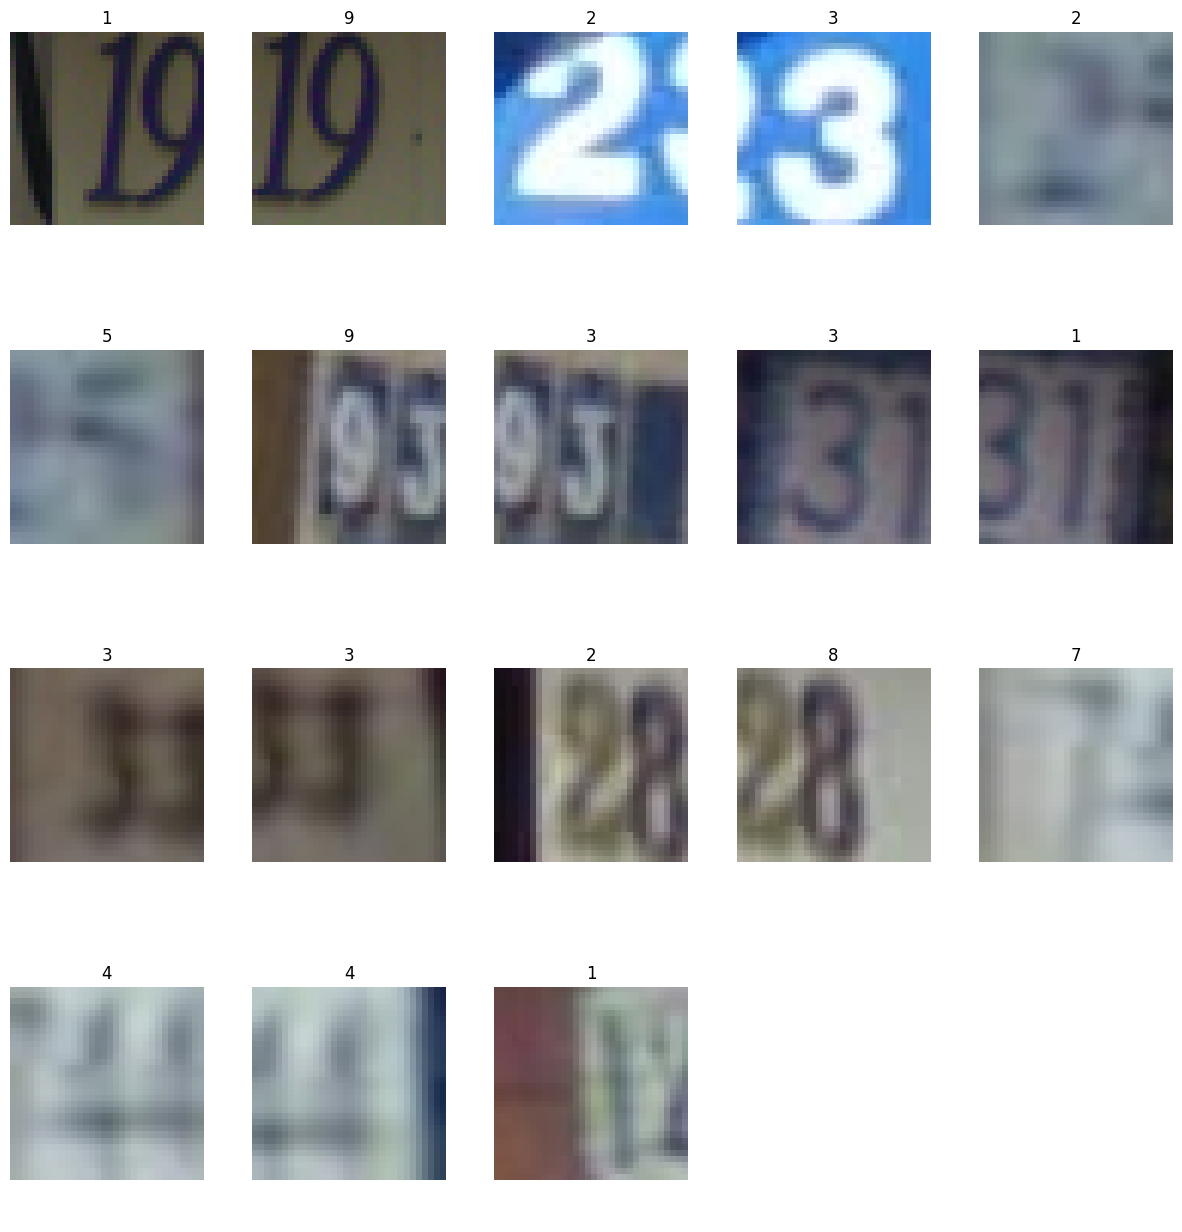

In [10]:
# mostrar una imagen
def mostrar_img(img, y):
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.axis('off')   # quita los ejes
    plt.title(y)
    plt.show()
# for i in range(6): mostrar_img(X_train[i],y_train[i])

# muestra varias imagenes a la vez (solo con el for quedaba muy feo)
def listar_imgs(imgs_arr, y_arr):
    n_fila = int(np.ceil((len(imgs_arr)+1)/5))
    fig,ax = plt.subplots(n_fila,5, figsize=(15,n_fila*4))
    ax = ax.flatten()
    # aniadimos las imagenes al grafico
    for i, img in enumerate(imgs_arr):
        ax[i].set_title(y_arr[i])
        ax[i].imshow(img, cmap="gray")
        ax[i].axis("off") 
    # eliminamos los huecos vacios
    for ax_vacio in ax[len(imgs_arr):]:  ax_vacio.axis("off")
    plt.subplots_adjust(wspace=0.25, hspace=0.15)   # ajusta los margenes para separar las imágenes 
    plt.show()

listar_imgs(X_test[:18], y_test[:18])

### Preparar

In [ ]:
# normalizar y pasar imagenes a escala grises


## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [11]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.